# PurchasePal

One stop solution to help you scrape the product reviews on ProductHunt about [Notion](https://www.producthunt.com/products/notion/) using [Scrapy](https://scrapy.org/?utm_campaign=Comt&utm_activity=EVT&utm_source=EVT&utm_referrer=Pratik&utm_primary=ZDAPI&utm_secondary=ZDAPI&utm_goal=SIN) and [Zyte API](https://www.zyte.com/zyte-api/?utm_campaign=Comt&utm_activity=EVT&utm_source=EVT&utm_referrer=Neha&utm_primary=ZDAPI&utm_secondary=ZDAPI&utm_goal=SIN) and summerize it using the ChatGPT API

Created by [Neha Setia](https://www.linkedin.com/in/nehasetia/) and [Pratik Parmar](https://www.linkedin.com/in/pratikparmar1/)

## 0 Prerequisites

### 0.1 Install necessary packages

In [ ]:
!pip install scrapy
!pip install scrapy-zyte-api
!pip install openai
!pip install pandas

### 0.2 Set [Zyte API key](https://docs.zyte.com/zyte-api/usage/setup.html#authorization?utm_campaign=Comt&utm_activity=EVT&utm_source=EVT&utm_referrer=Neha&utm_primary=ZDAPI&utm_secondary=ZDAPI&utm_goal=SIN)



In [35]:
import os

os.environ['zyte_api_key'] = "YOUR_ZYTE_API_HERE"

print(os.environ. get('zyte_api_key'))

YOUR_ZYTE_API_HERE


### 0.3 Connect Google Drive

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1 Scrape reviews from ProductHunt using Scrapy and Zyte API

### 1.1 Clone ReviewHunt Spider from GitHub

In [12]:
!wget https://raw.githubusercontent.com/HackyRoot/Workshop-Content/master/Zyte/PurchasePal/reviewhunt.py

--2023-03-29 17:41:36--  https://raw.githubusercontent.com/HackyRoot/Workshop-Content/master/Zyte/PurchasePal/reviewhunt.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13619 (13K) [text/plain]
Saving to: ‘reviewhunt.py.1’

reviewhunt.py.1     100%[===================>]  13.30K  --.-KB/s    in 0.001s  

2023-03-29 17:41:36 (24.3 MB/s) - ‘reviewhunt.py.1’ saved [13619/13619]



### 1.2 Run the Spider

The output of this spider will be stored in reviews.csv on the Google Drive

In [ ]:
!scrapy runspider reviewhunt.py -O /content/drive/MyDrive/Events/PurchasePal/reviews.csv

## 2 Review Summerization
Now the Cool AI Part begins here

### 2.1 Import necessary data science python packages

In [14]:
import openai
import pandas as pd
import random

### 2.2 Read csv file, discard all empty reviews & convert pandas dataframe into a list

In [16]:
reviews_df = pd.read_csv('/content/drive/MyDrive/Events/PurchasePal/reviews.csv')
reviews_df = reviews_df.dropna() 

In [17]:
#reviews_list = reviews_df.query('Rating > 4')['Review'].tolist()
reviews_list = reviews_df['review'].tolist()
reviews_list 

['Notion is a great managing tool.',
 'Notion is by far the best organizing tool that exists',
 'Wonderful',
 'Keep learning ! \nAmazing workspaces !',
 'pretty good!',
 'The copy-paste experience is not that great. But with a multi-layer page is pretty interesting.',
 'Great 👍',
 "Nice product but my team wasn't fully like it.",
 'good, but not super easy to start with',
 'Good App!',
 'pretty good!',
 'Notion is a great managing tool.',
 'Wonderful',
 'Keep learning ! \nAmazing workspaces !',
 'Great multi-purpose tool with a clean and easy to navigate interface.',
 'Its overall a good fit for individual contributors and planners.',
 'Love it! It helps to keep all the information in one place.',
 'Notion can be easily customized to fit your needs. Whether you want to grab inspiration and work on your idea, have a brilliant plan that needs to be executed, or just want to save some articles to read later, Notion delivers.',
 "It's a great way for writing documents, however the database

### 2.3 Select 100 reviews from the list randomly and combine all of the reviews to make it a one long string

In [18]:
random_100_reviews = random.sample(reviews_list,100)
random_100_reviews

["Notion is pretty solid – a versatile tool for note-taking, project management, and more. But it's not the only player in town. Check out alternatives like Coda or Craft if you're exploring options. Ultimately, it's about finding the tool that fits your workflow best.",
 'Notion provides a no-code environment to build a knowledge base or content center for companies or for personal use. The interface is super user-friendly and easy to understand. It could have some features regarding design, but I think this is not what Notion is trying to focus on. I used Notion both as a creator and as a user as well, and I can say that the interface makes it easy to use for every beginner. They recently introduced some new AI features, which states that the developers are on working hard to continuously improve Notion.',
 'I can schedule and plan my posts ahead.',
 'The copy-paste experience is not that great. But with a multi-layer page is pretty interesting.',
 "I've been using it as a repository

In [19]:
reviews = ','.join([review for review in random_100_reviews])


In [20]:
print(reviews)

Notion is pretty solid – a versatile tool for note-taking, project management, and more. But it's not the only player in town. Check out alternatives like Coda or Craft if you're exploring options. Ultimately, it's about finding the tool that fits your workflow best.,Notion provides a no-code environment to build a knowledge base or content center for companies or for personal use. The interface is super user-friendly and easy to understand. It could have some features regarding design, but I think this is not what Notion is trying to focus on. I used Notion both as a creator and as a user as well, and I can say that the interface makes it easy to use for every beginner. They recently introduced some new AI features, which states that the developers are on working hard to continuously improve Notion.,I can schedule and plan my posts ahead.,The copy-paste experience is not that great. But with a multi-layer page is pretty interesting.,I've been using it as a repository of information an

### 2.4 Configure ChatGPT prompt & set [OpenAI API key](https://platform.openai.com/account/api-keys)

In [21]:
prompt="Analyse these reviews:\n\n"+reviews+'"'
prompt
word_count = len(prompt.split())
print(word_count)

1692


In [34]:
openai.api_key = "YOUR_OPENAI_API_HERE" #update your own openai key here

### 2.5 Make an API call to ChatGPT & fetch the response

In [23]:
response = openai.Completion.create(
  model="text-davinci-003",
  prompt="Analyse these reviews about Notion and generate essential keyword list of reviews and suggest if i should subscribe or not::\n\n"+reviews+'"',
  temperature=0,
  max_tokens=1000,
  top_p=1.0,
  frequency_penalty=0.0,
  presence_penalty=0.0
)

In [ ]:
response = response.__dict__
response

In [25]:
review_analysis = response['_previous']['choices'][0]['text'].replace('\n','')

In [26]:
review_analysis

'Keywords: Notion, note-taking, project management, Coda, Craft, no-code environment, user-friendly, AI features, repository of information, knowledge base, scheduling, planning, copy-paste, multi-layer page, personal CRM, accounting suite, hierarchical structure, Markdown, syntax highlight, formatting, programming languages, mermaid, navigation, collaboration, documentation, database, UI, end to end encryption, offline data management, visual design, templates, flexibility, APIs, spreadsheets, collaboration, cron calendar, texts, Excel, productivity, management, remote team, tasks, UI improvement, navigation, documentation, tables, images, code, comment feature, strategy, game changer, calendar, integration, Youtube, functions, databases, sheets, export, Chinese, sync, digital life, business operational system, personal/biz knowledge management, creativity, automation, beta tester, affiliate, power users, notion ambassador, user voice, company missions, second brain, time saver, comeb

### 2.6 Create a wordcloud based on the keywords from the API response

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [28]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(review_analysis)

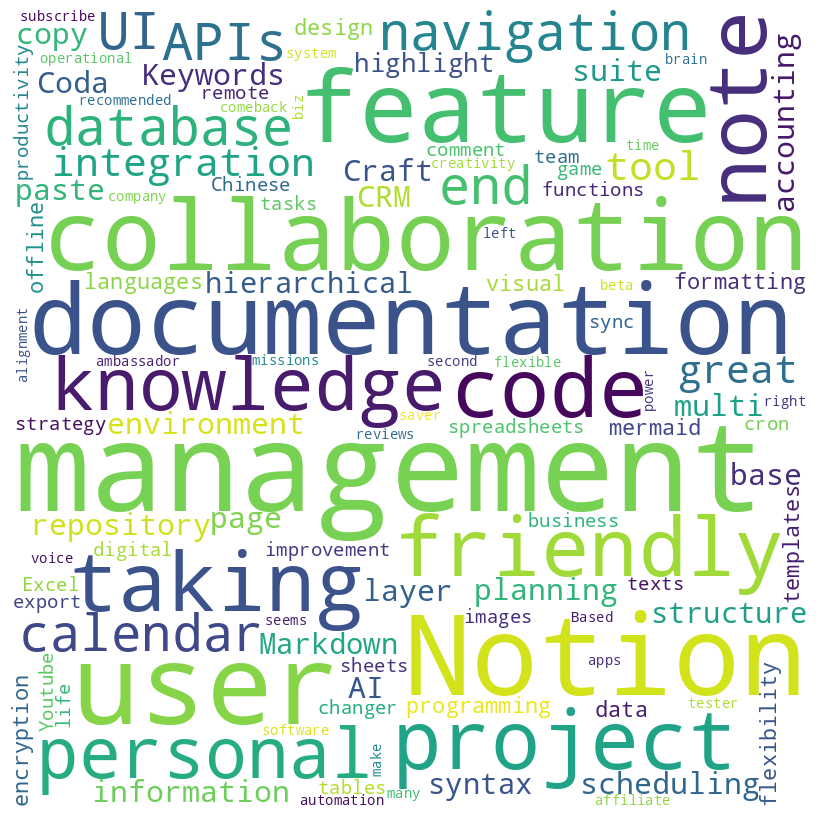

In [33]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.savefig('/content/drive/MyDrive/Events/PurchasePal/reviewcloud.png')

plt.show()

<Figure size 640x480 with 0 Axes>